In [1]:
## Goal: present how much color info we have initially
import numpy as np
import astropy.table as table
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load the ztflc lc
ztflc = table.Table.read('../data/ztflc_forcefit.h5')
ztflc['mag'] = -2.5*np.log10(ztflc['ampl']) + ztflc['magzp']
ztflc

<ipython-input-2-dce62b56b25f>:3: RuntimeWarning: invalid value encountered in log10
  ztflc['mag'] = -2.5*np.log10(ztflc['ampl']) + ztflc['magzp']


<Table length=233>
      sigma             sigma.err      ...      target_y             mag        
     float64             float64       ...      float64            float64      
------------------ ------------------- ... ------------------ ------------------
14.472378378366585  0.4071467539468257 ...  2654.133020444947  17.92843142235579
 42.79852101731375   1.254812629594178 ... 2611.4216225853434                nan
 5.019048789272439  0.1453871691987656 ... 2654.5798502072016  17.06698341427242
 10.72947163499287 0.30589623511701863 ...  2642.114116817149                nan
 9.184468245595319  0.2636963406672404 ... 2665.7851881538063  16.50688421556592
10.144355640294936 0.28890516819398504 ... 2696.8115424759967 19.531541402611747
  6.79480734831998 0.18939070960168858 ... 2691.7963713021577 16.579059937463732
27.448735561223543  0.7884957167202911 ...  2612.230865263725  16.73858080126218
 7.826544860818549 0.22435069687094494 ... 2675.8265929543913  17.49342041118784
  5.14333568356807 0.14392711628327534 ... 2483.9120007313904                nan
               ...                 ... ...                ...                ...
13.004702445429384 0.37086223104520827 ...  2655.985362217852                nan
 7.644904310915697 0.22698969397311558 ...  2663.612826282741  19.63778653647585
 7.754619449369814 0.22235180405527463 ... 2661.2855406879685 16.613258936977317
10.157528553702546 0.28721683436054907 ...  1830.625461010669  16.43251314447032
12.328326975949324  0.3508564506937175 ... 1845.3641322071367 23.908572040948386
 38.67995149442595   1.130666960923682 ... 2463.6649266767117 23.801683114931272
15.083117302180508 0.43154350803086433 ...  2653.319945188249                nan
21.702311848491192  0.6198597401396926 ...  2633.878591297881 16.757525861392907
 11.17162574053698 0.31134426347099214 ...  2671.502965566031 21.616630116551768
 4.429017756876249 0.13089623320578814 ... 2613.2088222185594 22.522869909718985

In [46]:
# load the swift-uvot observations
uvot=table.Table.read('../data/uvot_phot.txt', format='ascii')
uvot['mjd'] = uvot['JD'] - 2400000.5
idx = uvot['AB_MAG'] < uvot['AB_MAG_LIM']-3*uvot['AB_MAG_ERR']
#uvot[idx]
uvot

<Table length=30>
        JD         FILTER  AB_MAG ... AB_MAG_LIM  EXPOSURE        mjd        
     float64        str4  float64 ...  float64    float64       float64      
------------------ ------ ------- ... ---------- --------- ------------------
 2458718.671532725   UVW1 21.1707 ...    21.2422   157.237 58718.171532724984
 2458718.672967196      U 20.4926 ...    20.6174   78.5208  58718.17296719598
2458718.6739443885      B 18.9096 ...    19.9058   78.5099 58718.173944388516
 2458718.676326107   UVW2 22.8054 ...    22.0495  314.7237  58718.17632610677
 2458718.678691991      V 18.5903 ...     18.981   78.5099  58718.17869199114
2458718.6864458714   UVM2 22.4146 ...    22.7858 1232.0625  58718.18644587137
2458719.9762494587   UVW1 21.2914 ...    21.7586  314.4848 58719.476249458734
2458719.9776854618      U 20.6638 ...     21.086  157.0415  58719.47768546175
2458719.9786609937      B 18.7056 ...    20.3376  157.0089 58719.478660993744
 2458719.981038498   UVW2 22.2051 ...    22.5072  629.4365  58719.48103849823
               ...    ...     ... ...        ...       ...                ...
 2458722.466636421      B 18.0553 ...    19.9228   83.4398  58721.96663642116
2458722.4696758366   UVW2 21.6442 ...    22.2635  420.0442  58721.96967583662
2458722.4726960976      V 17.4948 ...    19.0146   83.4398  58721.97269609757
 2458722.477111435   UVM2 22.5054 ...     22.325   659.331  58721.97711143503
2458722.9923105906   UVW1 21.4382 ...    21.5357  228.8485  58722.49231059058
2458722.9930524146      U 19.3981 ...    20.5972   76.3055  58722.49305241462
2458722.9935571323      B 17.7854 ...    19.8712   76.3164 58722.493557132315
2458722.9953806284   UVW2 22.3304 ...    22.2042  381.4299  58722.49538062839
 2458722.996366376      V 17.3002 ...    18.9591   76.3381  58722.49636637606
2458722.9991869847   UVM2 21.9423 ...    22.2645  603.0602  58722.49918698473

In [71]:
# load atlas
atlas = table.Table.read('../data/forced_photometry/job19862.txt', format='ascii')
atlas['mjd'] = atlas['##MJD']
atlas[atlas['mjd'] > 58712]

<Table length=654>
   ##MJD        m       dm    uJy  ...   Sky        Obs           mjd     
  float64    float64 float64 int64 ... float64     str14        float64   
------------ ------- ------- ----- ... ------- -------------- ------------
 58719.48902  18.455   0.064   151 ...   21.01 02a58719o0445o  58719.48902
 58719.49253  18.355   0.066   165 ...   21.02 02a58719o0452o  58719.49253
58719.498063    18.5    0.07   144 ...   21.02 02a58719o0463o 58719.498063
58719.509526  18.542   0.092   139 ...   21.02 02a58719o0484o 58719.509526
58721.380286  17.952   0.043   239 ...   20.91 01a58721o0338o 58721.380286
58721.388952  18.064   0.054   216 ...   20.86 01a58721o0355o 58721.388952
58721.391788  18.076   0.047   214 ...   21.04 01a58721o0361o 58721.391788
58721.411364  18.034   0.041   222 ...   21.15 01a58721o0401o 58721.411364
58723.355243  17.408   0.023   395 ...    21.8 02a58723o0220c 58723.355243
58723.358494  17.401   0.027   398 ...   21.81 02a58723o0227c 58723.358494
         ...     ...     ...   ... ...     ...            ...          ...
59227.243379 -17.354   0.019  -416 ...   21.11 02a59227o0105c 59227.243379
59227.256215 -17.459   0.023  -377 ...   21.07 02a59227o0133c 59227.256215
59235.215595  16.278   2.396  1118 ...   14.05 02a59235o0019o 59235.215595
59235.219252 -19.613   1.963   -52 ...    16.5 02a59235o0027o 59235.219252
59235.224759 -17.176   0.492  -490 ...   16.24 02a59235o0039o 59235.224759
59235.236664 -19.515    0.99   -57 ...   17.64 02a59235o0065o 59235.236664
59243.212789 -19.682   1.012   -49 ...   17.56 02a59243o0026o 59243.212789
59243.215988 -18.648   0.319  -126 ...   18.12 02a59243o0033o 59243.215988
59243.224239  -18.47   0.234  -149 ...   18.52 02a59243o0051o 59243.224239
 59243.23571 -19.041   0.485   -88 ...   18.38 02a59243o0076o  59243.23571

'B'
'U'
'UVM2'
'UVW1'
'UVW2'
'V'


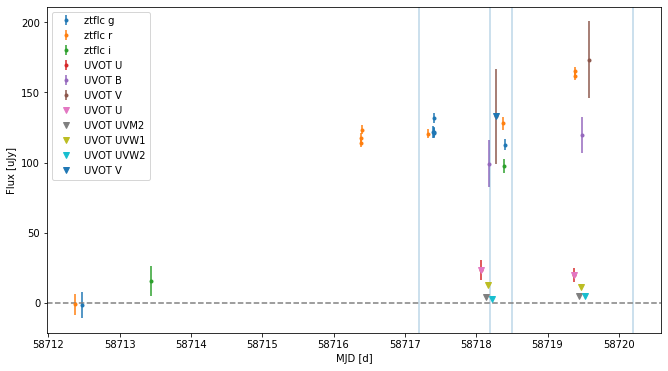

In [70]:
scalezp = 0

plt.figure(figsize=(11,6))

# plot ztflc
for band in 'gri':
    # plot ztflc lc
    idx = np.logical_and(ztflc['filter'] == ('ZTF_%s' % band), np.logical_and(ztflc['obsmjd'] > 58710, ztflc['obsmjd'] < 58720))
    f0coef = 3631e6 * 10 ** (-(ztflc["magzp"][idx] - scalezp) / 2.5)
    plt.errorbar(ztflc['obsmjd'][idx], f0coef*ztflc['ampl'][idx], yerr=f0coef*ztflc['ampl.err'][idx], fmt='.', label='ztflc %s' % band)

# plot ATLAS
for band in 'oc':
    idx = np.logical_and(atlas['F'] == band, np.logical_and(atlas['mjd'] > 58710, atlas['mjd'] < 58720))
    #plt.errorbar(atlas['mjd'][idx], atlas['uJy'][idx], yerr=atlas['duJy'][idx], fmt='.', label='ATLAS %s' % band)

# plot UVOT detections
idx = np.logical_and(uvot['AB_MAG'] < uvot['AB_MAG_LIM'], uvot['mjd'] < 58720)
#idx = np.logical_and(uvot['AB_MAG'] < uvot['AB_MAG_LIM'], uvot['mjd'] < 58740)
for i, band in enumerate(['U', 'B', 'V']):
    idx2 = np.logical_and(idx, uvot['FILTER'] == band)
    if np.count_nonzero(idx2) == 0:
        continue
    flux = 3631e6 * 10 ** (-uvot['AB_MAG']/2.5)
    flux_err = uvot['AB_MAG_ERR'] * flux / 1.087
    plt.errorbar(uvot['mjd'][idx2]+(i-1)*0.1, flux[idx2], yerr=flux_err[idx2], fmt='.', label='UVOT %s' % band)

# plot UVOT non-detections
idx = np.logical_and(uvot['AB_MAG'] >= uvot['AB_MAG_LIM']-3*uvot['AB_MAG_ERR'], uvot['mjd'] < 58720)
#idx = np.logical_and(uvot['AB_MAG'] >= uvot['AB_MAG_LIM']-3*uvot['AB_MAG_ERR'], uvot['mjd'] < 58740)
for i, band in enumerate(np.unique(uvot['FILTER'])):
    print(repr(band))
    if band == 'B':
        continue
    idx2 = np.logical_and(idx, uvot['FILTER'] == band)
    if np.count_nonzero(idx2) == 0:
        continue
    flux = 3631e6 * 10 ** (-uvot['AB_MAG']/2.5)
    #flux_err = uvot['AB_MAG_ERR'] * flux / 1.087
    plt.errorbar(uvot['mjd'][idx2]+(i-3)*0.05, flux[idx2], fmt='v', label='UVOT %s' % band)
    
# spectroscopy times
spectimes = [58717.2, 58718.2, 58718.5, 58720.2]
for mjd in spectimes:
    plt.axvline(x=mjd, alpha=0.3)
    
# plot UVOT times
idx = uvot['mjd'] < 58720
#for mjd in uvot['mjd'][idx]:
#    plt.axvline(x=mjd, alpha=0.2, color='green')

# zero flux level
plt.axhline(0, ls="--", color="0.5")
plt.legend()
plt.xlabel('MJD [d]')
plt.ylabel('Flux [uJy]')
#plt.savefig('2021-05-27-show-ztflc-init.png')
plt.savefig('../paper/plots/tmp_lc_ztflc_pre_explosion.png')

In [52]:
np.unique(uvot['FILTER'])

<Column name='FILTER' dtype='str4' length=6>
   B
   U
UVM2
UVW1
UVW2
   V